In [1]:
import pandas as pd
import numpy as np


In [8]:
cars_df = pd.read_csv("C:/Users/matas/Desktop/CarPricesPrediction.csv")


In [9]:
cars_df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [10]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [14]:

cars_df['Make'].value_counts()
cars_df['Model'].value_counts()
cars_df['Condition'].value_counts()

Condition
Excellent    595
Good         292
Fair         113
Name: count, dtype: int64

In [15]:
cars_df.describe()

,Unnamed: 0,Year,Mileage,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,2015.86500,78796.927000,22195.205650
std,288.819436,3.78247,39842.259941,4245.191585
min,0.000000,2010.00000,10079.000000,12613.000000
25%,249.750000,2013.00000,44942.750000,18961.862500
50%,499.500000,2016.00000,78056.500000,22247.875000
75%,749.250000,2019.00000,112366.250000,25510.275000
max,999.000000,2022.00000,149794.000000,31414.900000


In [18]:
import matplotlib.pyplot as plt


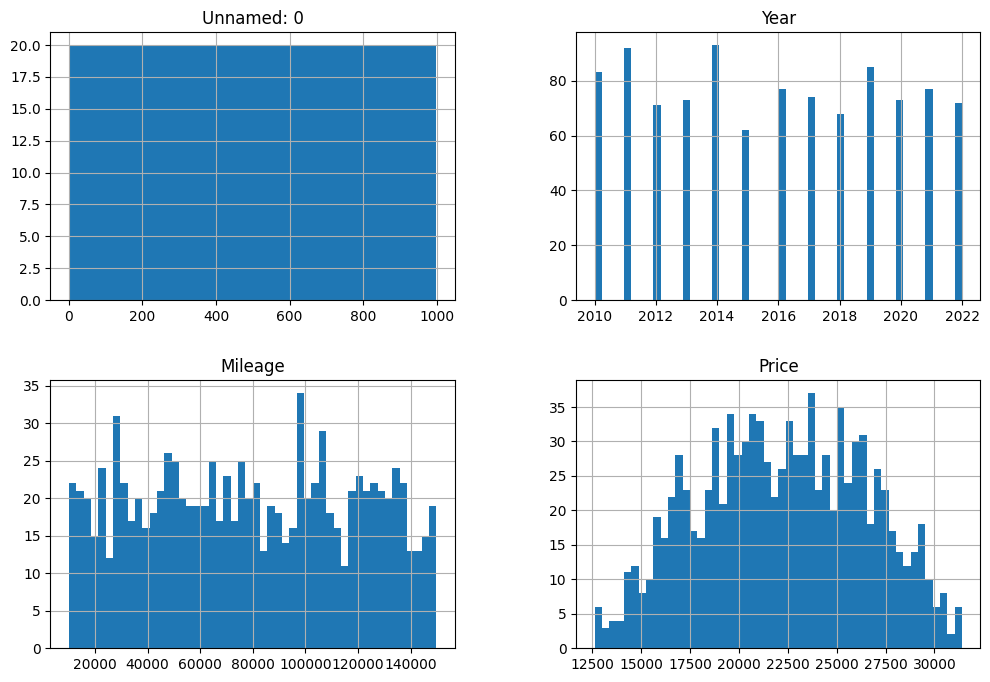

In [19]:
cars_df.hist(bins=50,figsize=(12,8))
plt.show()

In [21]:
cars_df =cars_df.drop(['Unnamed: 0'], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_val_data,test_data=train_test_split(cars_df,test_size=0.2,random_state=42)

In [24]:
train_data,val_data=train_test_split(train_val_data,test_size=0.25,random_state=42)

In [25]:
cars=cars_df.copy()

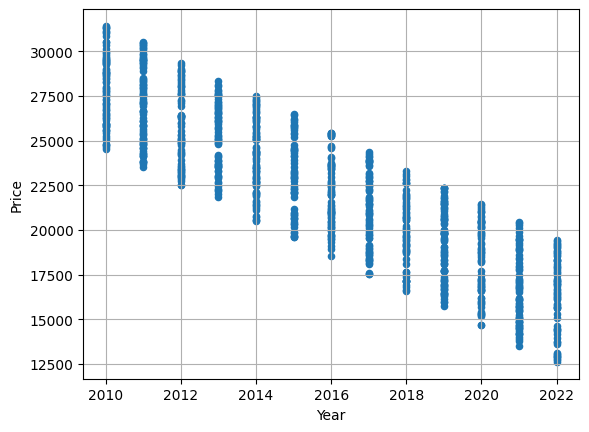

In [30]:
import seaborn as sns
cars.plot(kind='scatter',x='Year',y='Price',grid=True)
plt.show()

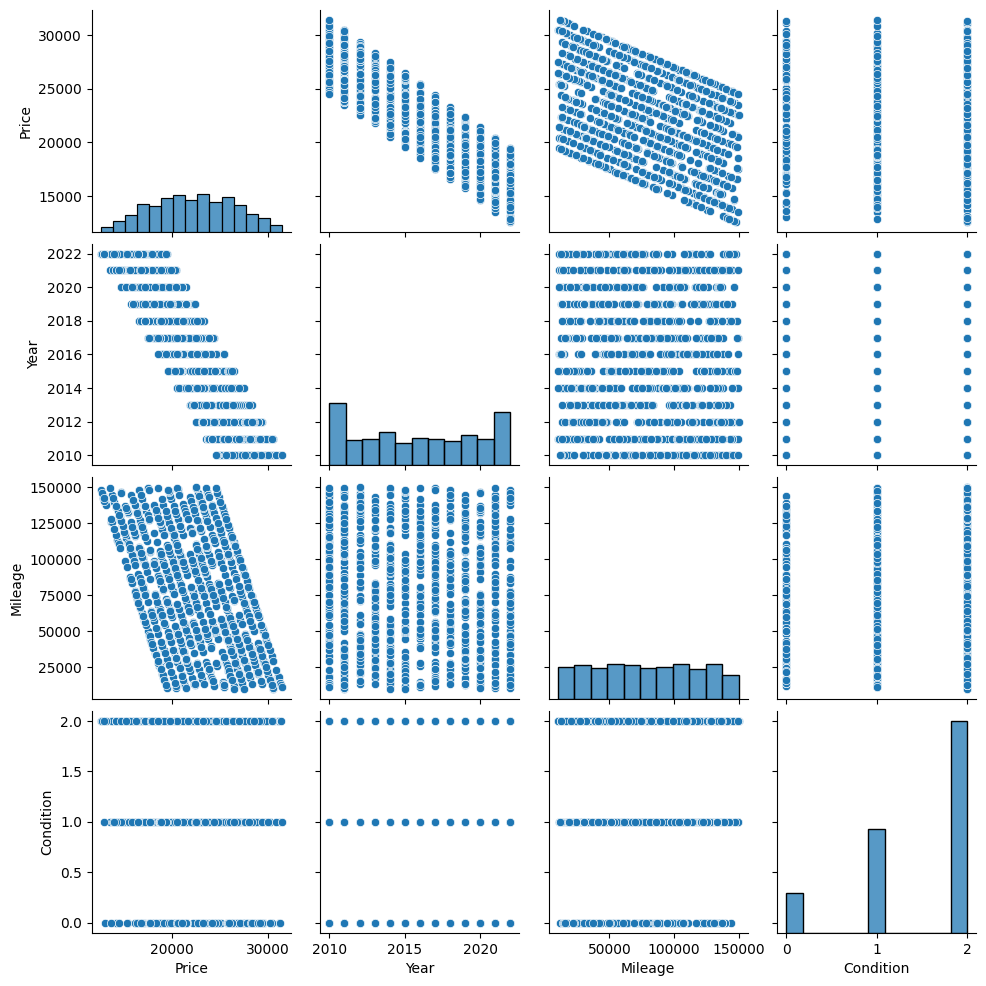

In [40]:
sns.pairplot(cars[['Price', 'Year', 'Mileage', 'Condition']])
plt.show()

In [37]:
condition_mapping={'Excellent': 2 ,'Good':1,'Fair':0}
cars['Condition']=cars['Condition'].map(condition_mapping)
cars.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,2,19094.75
1,Toyota,Silverado,2014,13578,2,27321.10
2,Chevrolet,Civic,2016,46054,1,23697.30
3,Ford,Civic,2022,34981,2,18251.05
4,Chevrolet,Civic,2019,63565,2,19821.85


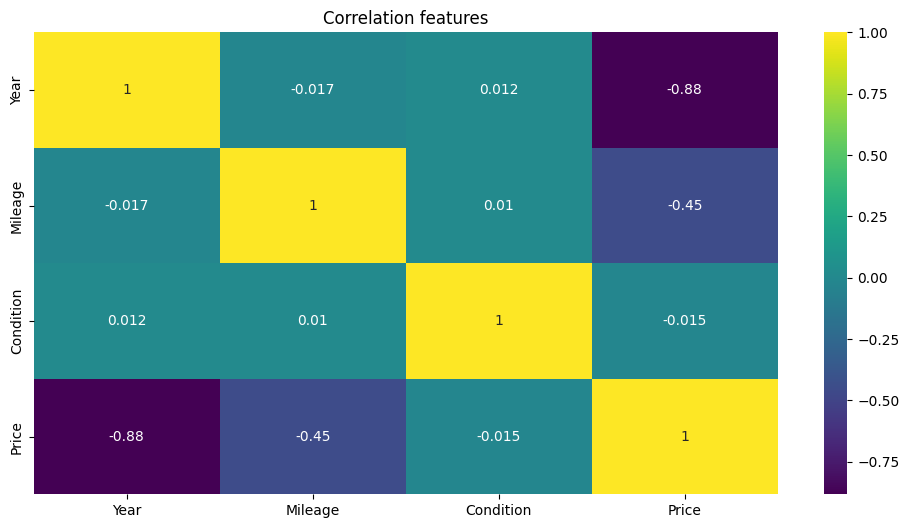

In [39]:
cars_corr = ['Year', 'Mileage', 'Condition', 'Price']

plt.figure(figsize= (12,6))
sns.heatmap(cars[cars_corr].corr(), cmap = 'viridis', annot = True)
plt.title('Correlation features')
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

df = pd.get_dummies(cars)

X, y= df.drop(['Price'], axis = 1), df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =23)
model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

0.0038650681383644806


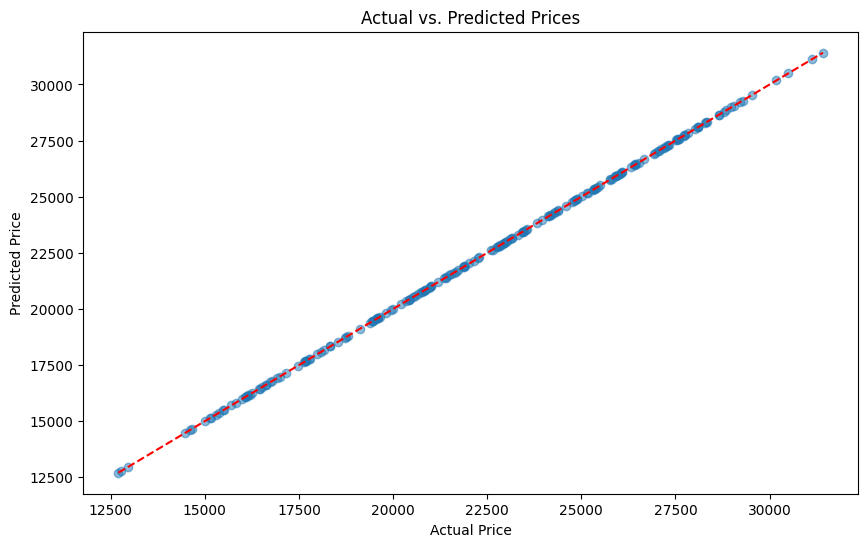

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()